In [4]:
import cv2

# Load the image
image = cv2.imread('Fig0222(b)(cameraman).tif')

# Get the dimensions
height, width, channels = image.shape

# Print the dimensions
print("Width:", width)
print("Height:", height)
print("Number of channels (e.g., 3 for RGB):", channels)

Width: 256
Height: 256
Number of channels (e.g., 3 for RGB): 3


In [3]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Fig0222(c)(crowd).tif')

# image = cv2.imread('Fig0222(b)(cameraman).tif')

# Define the new dimensions (target size)
new_width = 128  # Change this to your desired width
new_height = 128  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
cv2.imwrite('Crowd_low_output.jpg', resized_image)  # Save the result

# cv2.imwrite('Camera_low_output.jpg', resized_image)  # Save the result

# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

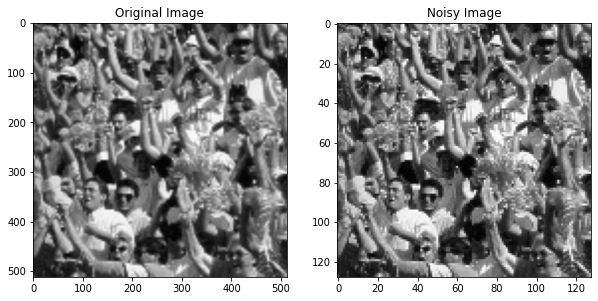

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Crowd_low_output.jpg')

# image = cv2.imread('Camera_low_output.jpg')

# Define the new dimensions (target size)
new_width = 512  # Change this to your desired width
new_height = 512  # Change this to your desired height

# new_width = 256  # Change this to your desired width
# new_height = 256  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
cv2.imwrite('Bilinear_Crowd_output.jpg', resized_image)  # Save the result
# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.imwrite('Bilinear_Camera_output.jpg', resized_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(resized_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image, cmap='gray'), plt.title('Noisy Image')
plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Face_output.jpg')

# original_image = cv2.imread('Fig0222(b)(cameraman).tif')
# compressed_image = cv2.imread('Bilinear_Camera_output.jpg')

original_image = cv2.imread('Bilinear_Crowd_output.jpg')
compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 23.32001592610014


## Salt and pepper noise

In [7]:
import cv2
import numpy as np

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)

    # Add salt noise
    num_salt = np.ceil(salt_prob * image.size)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

# Load an image
# image = cv2.imread('Low_test image Bilinear__output.tif')

image = cv2.imread('Face_low_output.jpg')


# Define salt and pepper probabilities (adjust as needed)
salt_probability = 0.01  # Probability of salt noise
pepper_probability = 0.01  # Probability of pepper noise

# Add salt and pepper noise to the image
noisy_image = add_salt_and_pepper_noise(image, salt_probability, pepper_probability)


# Save the noisy image
# cv2.imwrite('salt_noisy_image.jpg', noisy_image)

cv2.imwrite('Face_salt_noisy_image.jpg', noisy_image)

# Display the noisy image
# cv2.imshow('Salt Noisy Image', noisy_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




True

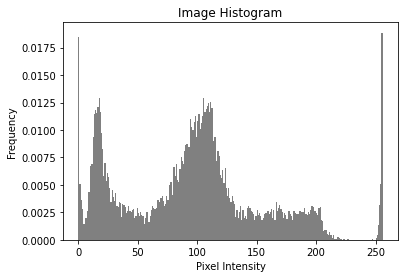

In [8]:
import cv2
import matplotlib.pyplot as plt

def plot_histogram(image):
    plt.hist(image.flatten(), bins=256, range=[0, 256], density=True, cumulative=False, color='gray')
    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

image = cv2.imread('Face_salt_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)
plot_histogram(image)


In [8]:
import cv2
import numpy as np

# Load the image
# image = cv2.imread('salt_noisy_image.jpg')

image = cv2.imread('Camera_salt_noisy_image.jpg')

# Define the new dimensions (target size)
# new_width = 512  # Change this to your desired width
# new_height = 512  # Change this to your desired height

# new_width = 300  # Change this to your desired width
# new_height = 300  # Change this to your desired height

new_width = 256  # Change this to your desired width
new_height = 256  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
# cv2.imwrite('Bilinear_Salt_output.jpg', resized_image)  # Save the result

# cv2.imwrite('Bilinear_Face_Salt_output.jpg', resized_image)  # Save the result

cv2.imwrite('Bilinear_Camera_Salt_output.jpg', resized_image)  # Save the result

# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [9]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Salt_output.jpg')

# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Face_Salt_output.jpg')

original_image = cv2.imread('Fig0222(b)(cameraman).tif')
compressed_image = cv2.imread('Bilinear_Camera_Salt_output.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 17.676110185705614


## Median filter

In [9]:
import cv2

# Read the noisy image
noisy_image = cv2.imread('Face_salt_noisy_image.jpg', cv2.IMREAD_COLOR)

# noisy_image = cv2.imread('Camera_salt_noisy_image.jpg', cv2.IMREAD_COLOR)

# noisy_image = cv2.imread('salt_noisy_image.jpg', cv2.IMREAD_COLOR)

# Apply median filtering
filtered_image = cv2.medianBlur(noisy_image, ksize=3)  # You can adjust the kernel size (ksize)

# Display or save the filtered image
cv2.imwrite('Median_Face_salt_noisy_image.jpg', filtered_image)

# cv2.imwrite('Median_Camera_salt_noisy_image.jpg', filtered_image)

# cv2.imwrite('Median_Crowd_salt_noisy_image.jpg', filtered_image)


True

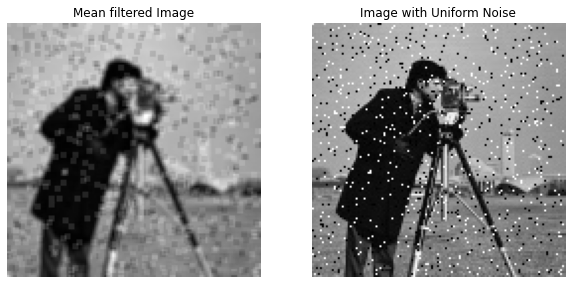

In [63]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('Camera_salt_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

# # Add uniform noise (example)
# noise = np.random.uniform(low=-50, high=50, size=image.shape).astype(np.uint8)
# noisy_image = cv2.add(image, noise)

# Apply a mean filter
kernel_size = 3  # Adjust the kernel size as needed
filtered_image = cv2.blur(image, (kernel_size, kernel_size))

cv2.imwrite('MeanF_Camera_salt_noisy_image.jpg', filtered_image)

# Display the results
# cv2.imshow('Original Image', image)
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Mean filtered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Image with Uniform Noise')
plt.axis('off')

plt.show()


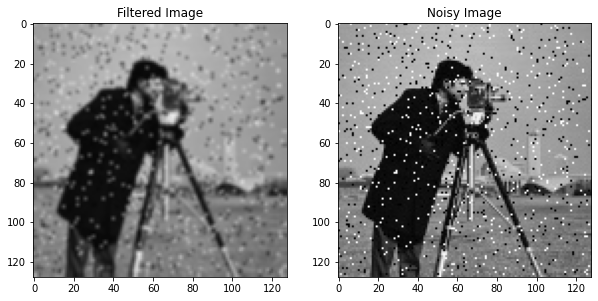

In [61]:
import cv2
import numpy as np

# Load the noisy image
noisy_image = cv2.imread('Camera_salt_noisy_image.jpg')

# Apply Gaussian filter for noise reduction
filtered_image = cv2.GaussianBlur(noisy_image, (3, 3), 0)

# Save the filtered image
# cv2.imwrite('Gaussian_denoising_filtered_image.jpg', filtered_image)

cv2.imwrite('GaussianF_Camera_salt_noisy_image.jpg', filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

In [64]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Salt_output.jpg')

# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Face_Salt_output.jpg')

original_image = cv2.imread('Camera_low_output.jpg')
compressed_image = cv2.imread('MeanF_Camera_salt_noisy_image.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 22.3873350424271


In [10]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Median_Face_salt_noisy_image.jpg')
# image = cv2.imread('Median_Camera_salt_noisy_image.jpg')

# image = cv2.imread('Median_Crowd_salt_noisy_image.jpg')

# Define the new dimensions (target size)
new_width = 300  # Change this to your desired width
new_height = 300  # Change this to your desired height

# new_width = 256  # Change this to your desired width
# new_height = 256  # Change this to your desired height

# new_width = 512  # Change this to your desired width
# new_height = 512  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
cv2.imwrite('Bilinear_Median_Face_salt_noisy_image.jpg', resized_image)  # Save the result

# cv2.imwrite('Bilinear_Median_Camera_salt_noisy_image.jpg', resized_image)  # Save the result

# cv2.imwrite('Bilinear_Median_Crowd_salt_noisy_image.jpg', resized_image)  # Save the result


# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [66]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Median_Crowd_salt_noisy_image.jpg')

# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Median_Face_salt_noisy_image.jpg')

original_image = cv2.imread('Fig0222(b)(cameraman).tif')
compressed_image = cv2.imread('Bilinear_Median_Camera_salt_noisy_image.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 22.642978622087725


## Gaussian noise

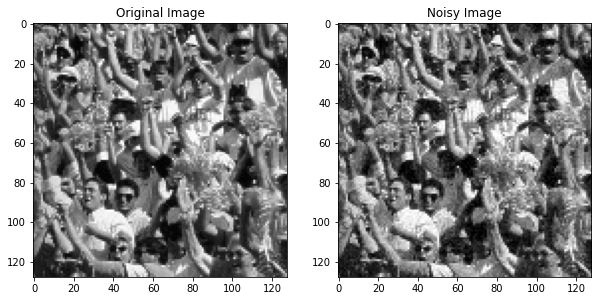

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=10):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

# Read the grayscale image
original_image = cv2.imread('Crowd_low_output.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(original_image)

cv2.imwrite('Crowd_gaussian_noisy_image.jpg', noisy_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

# Display the original and noisy images
# cv2.imshow('Original Image', original_image)
# cv2.imshow('Noisy Image (Gaussian Noise)', noisy_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


## Harmonic mean filter

c:\Users\Harpreet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


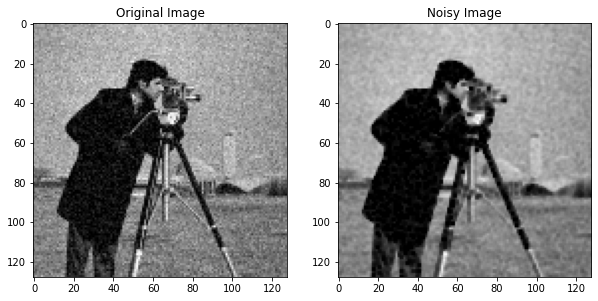

In [7]:
import cv2
import numpy as np
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt


def harmonic_mean(values):
    reciprocal_values = 1.0 / values
    return len(values) / np.sum(reciprocal_values)

def harmonic_mean_filter(image, filter_size):
    filtered_image = generic_filter(image, harmonic_mean, size=filter_size)
    return filtered_image.astype(np.uint8)

# Example usage:
# Assuming 'input_image' is your input image array

input_image= cv2.imread('Camera_gaussian_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

output_image = harmonic_mean_filter(input_image, (2, 2))

cv2.imwrite('harmonic_Camera_gaussian_noisy_image.jpg', output_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(input_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(output_image, cmap='gray'), plt.title('Noisy Image')
plt.show()


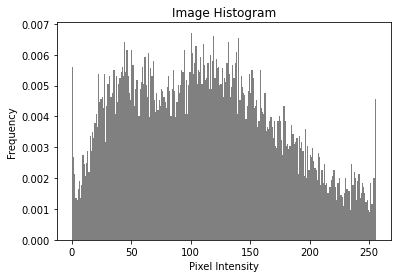

In [24]:
import cv2
import matplotlib.pyplot as plt

def plot_histogram(image):
    plt.hist(image.flatten(), bins=256, range=[0, 256], density=True, cumulative=False, color='gray')
    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

image = cv2.imread('Crowd_gaussian_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)
plot_histogram(image)

c:\Users\Harpreet\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


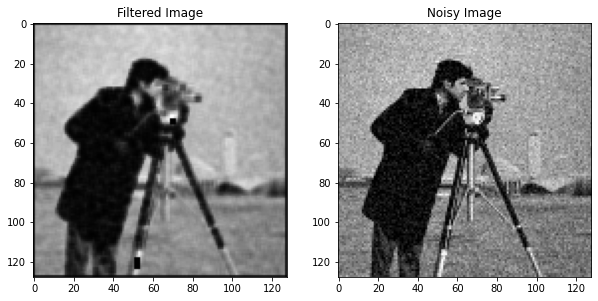

In [72]:
import cv2
import numpy as np

def geometric_mean_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

    rows, cols = image.shape
    filtered_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            geometric_mean = np.exp(np.mean(np.log(neighborhood + 1))) - 1
            filtered_image[i - pad_size, j - pad_size] = np.clip(geometric_mean, 0, 255)

    return filtered_image

# Read the noisy image (grayscale)
noisy_image = cv2.imread('Camera_gaussian_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply geometric mean filter
filtered_image = geometric_mean_filter(noisy_image, kernel_size=3)

cv2.imwrite('geometric_Camera_gaussian_noisy_image.jpg', filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

# Display the original, noisy, and filtered images
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image (Geometric Mean)', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Median_Crowd_salt_noisy_image.jpg')

# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Median_Face_salt_noisy_image.jpg')

original_image = cv2.imread('Camera_low_output.jpg')
compressed_image = cv2.imread('harmonic_Camera_gaussian_noisy_image.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 21.726487002313437


In [47]:
import cv2
import numpy as np

# Load the image
# image = cv2.imread('Median_Face_salt_noisy_image.jpg')
image = cv2.imread('geometric_Camera_gaussian_noisy_image.jpg')

# image = cv2.imread('Median_Crowd_salt_noisy_image.jpg')

# Define the new dimensions (target size)
# new_width = 300  # Change this to your desired width
# new_height = 300  # Change this to your desired height

new_width = 256  # Change this to your desired width
new_height = 256  # Change this to your desired height

# new_width = 512  # Change this to your desired width
# new_height = 512  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
# cv2.imwrite('Bilinear_Median_Face_salt_noisy_image.jpg', resized_image)  # Save the result

cv2.imwrite('Bilinear_geometric_Camera_gaussian_noisy_image.jpg', resized_image)  # Save the result

# cv2.imwrite('Bilinear_Median_Crowd_salt_noisy_image.jpg', resized_image)  # Save the result


# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [48]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Median_Crowd_salt_noisy_image.jpg')

# original_image = cv2.imread('Fig0222(a)(face).tif')
# compressed_image = cv2.imread('Bilinear_Median_Face_salt_noisy_image.jpg')

original_image = cv2.imread('Fig0222(b)(cameraman).tif')
compressed_image = cv2.imread('Bilinear_geometric_Camera_gaussian_noisy_image.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 17.88073069264122


## Gaussian filter 

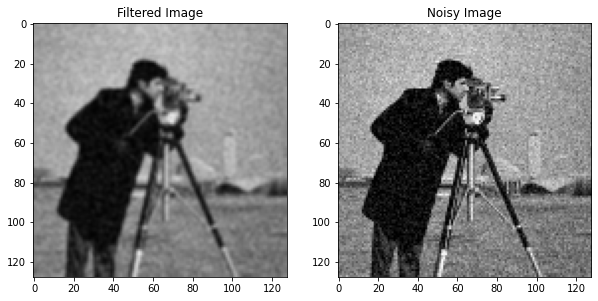

In [73]:
import cv2
import numpy as np

# Load the noisy image
noisy_image = cv2.imread('Camera_gaussian_noisy_image.jpg')

# Apply Gaussian filter for noise reduction
filtered_image = cv2.GaussianBlur(noisy_image, (3, 3), 0)

# Save the filtered image
# cv2.imwrite('Gaussian_denoising_filtered_image.jpg', filtered_image)

cv2.imwrite('GaussianF_Camera_gaussian_noisy_image.jpg', filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()


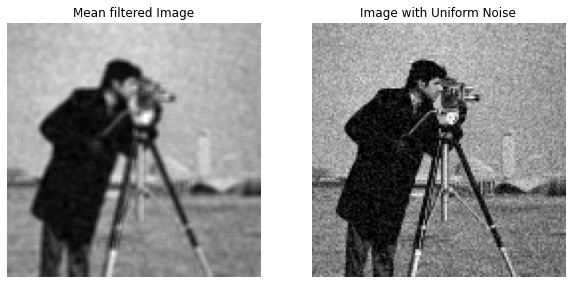

In [74]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('Camera_gaussian_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

# # Add uniform noise (example)
# noise = np.random.uniform(low=-50, high=50, size=image.shape).astype(np.uint8)
# noisy_image = cv2.add(image, noise)

# Apply a mean filter
kernel_size = 3  # Adjust the kernel size as needed
filtered_image = cv2.blur(image, (kernel_size, kernel_size))

cv2.imwrite('MeanF_Camera_gaussian_noisy_image.jpg', filtered_image)

# Display the results
# cv2.imshow('Original Image', image)
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Mean filtered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Image with Uniform Noise')
plt.axis('off')

plt.show()


In [92]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('GaussianF_Camera_uniform_noisy_image.jpg')

# Define the new dimensions (target size)
new_width = 256  # Change this to your desired width
new_height = 256  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
cv2.imwrite('Bilinear_GaussianF_Camera_uniform_noisy_image.jpg', resized_image)  # Save the result
# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [94]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images

original_image = cv2.imread('Fig0222(b)(cameraman).tif')
compressed_image = cv2.imread('Bilinear_GaussianF_Camera_uniform_noisy_image.jpg')

# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Gaussian_Salt_output.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 20.099101893118462


## Uniform noise

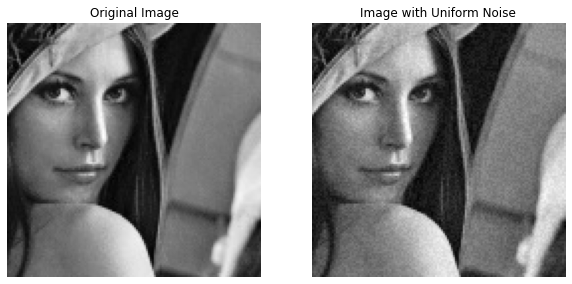

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_uniform_noise(image, intensity_range=(0, 20)):
    """
    Add uniform noise to an image.

    Parameters:
    - image: Input image (numpy array).
    - intensity_range: Range of noise intensity values. Default is (0, 50).

    Returns:
    - Noisy image.
    """
    noise = np.random.uniform(intensity_range[0], intensity_range[1], image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Load your image (replace 'your_image_path.jpg' with the actual file path)
image = cv2.imread('Face_low_output.jpg', cv2.IMREAD_GRAYSCALE)

# Add uniform noise
noisy_image = add_uniform_noise(image)

cv2.imwrite('Face_uniform_noisy_image.jpg', noisy_image)  # Save the result


# Display original and noisy images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Uniform Noise')
plt.axis('off')

plt.show()


## Geometric mean filter

c:\Users\Harpreet\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


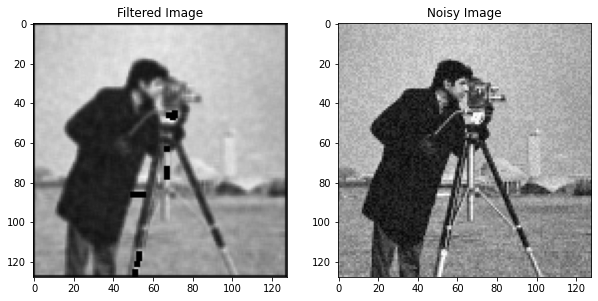

In [85]:
import cv2
import numpy as np

def geometric_mean_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

    rows, cols = image.shape
    filtered_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            geometric_mean = np.exp(np.mean(np.log(neighborhood + 1))) - 1
            filtered_image[i - pad_size, j - pad_size] = np.clip(geometric_mean, 0, 255)

    return filtered_image

# Read the noisy image (grayscale)
noisy_image = cv2.imread('Camera_uniform_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply geometric mean filter
filtered_image = geometric_mean_filter(noisy_image, kernel_size=3)

cv2.imwrite('geometric_Camera_uniform_noisy_image.jpg', filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

# Display the original, noisy, and filtered images
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image (Geometric Mean)', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


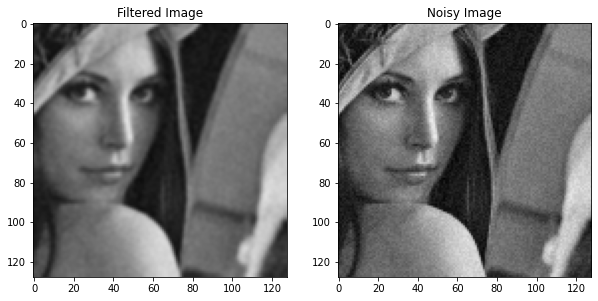

In [37]:
import cv2
import numpy as np

# Load the noisy image
noisy_image = cv2.imread('Face_uniform_noisy_image.jpg')

# Apply Gaussian filter for noise reduction
filtered_image = cv2.GaussianBlur(noisy_image, (3, 3), 0)

# Save the filtered image
# cv2.imwrite('Gaussian_denoising_filtered_image.jpg', filtered_image)

cv2.imwrite('GaussianF_Face_uniform_noisy_image.jpg', filtered_image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()


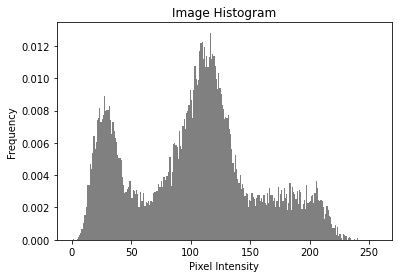

In [36]:
import cv2
import matplotlib.pyplot as plt

def plot_histogram(image):
    plt.hist(image.flatten(), bins=256, range=[0, 256], density=True, cumulative=False, color='gray')
    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

image = cv2.imread('Face_uniform_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)
plot_histogram(image)

## Uniform noise

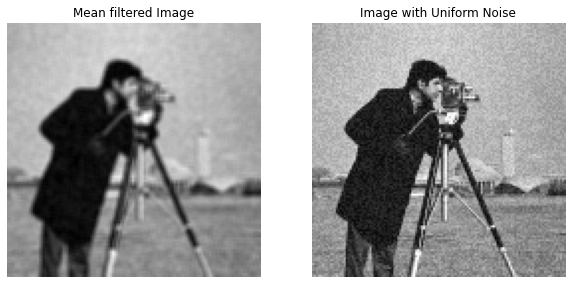

In [88]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('Camera_uniform_noisy_image.jpg', cv2.IMREAD_GRAYSCALE)

# # Add uniform noise (example)
# noise = np.random.uniform(low=-50, high=50, size=image.shape).astype(np.uint8)
# noisy_image = cv2.add(image, noise)

# Apply a mean filter
kernel_size = 3  # Adjust the kernel size as needed
filtered_image = cv2.blur(image, (kernel_size, kernel_size))

cv2.imwrite('MeanF_Camera_uniform_noisy_image.jpg', filtered_image)

# Display the results
# cv2.imshow('Original Image', image)
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Mean filtered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Image with Uniform Noise')
plt.axis('off')

plt.show()


In [91]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images

original_image = cv2.imread('Camera_low_output.jpg')
compressed_image = cv2.imread('geometric_Camera_uniform_noisy_image.jpg')

# original_image = cv2.imread('Fig0222(c)(crowd).tif')
# compressed_image = cv2.imread('Bilinear_Gaussian_Salt_output.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 17.7430055475797


In [75]:
import cv2
import numpy as np

# Load your noisy image
noisy_image = cv2.imread('salt_noisy_image.jpg', cv2.IMREAD_COLOR)

# Define the point spread function (PSF) - this models the blurring in the image
psf = np.ones((3, 3)) / 9  # You can adjust the size and shape of the PSF

# Apply the Wiener filter for deconvolution
deconvolved_image = cv2.filter2D(noisy_image, -1, psf)

# Display or save the deconvolved image
cv2.imwrite('Wiener_deconvolved_denoising_filtered_image.jpg', deconvolved_image)

# You can also compare this deconvolved image with the noisy image using evaluation metrics


True

In [76]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Wiener_deconvolved_denoising_filtered_image.jpg')

# Define the new dimensions (target size)
new_width = 512  # Change this to your desired width
new_height = 512  # Change this to your desired height

# Perform bilinear interpolation
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Save or display the interpolated image
cv2.imwrite('Bilinear_Wiener_Salt_output.jpg', resized_image)  # Save the result
# cv2.imshow('Bilinear Interpolation', resized_image)  # Display the result
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [77]:
import cv2
import numpy as np

def psnr(original_img, compressed_img):
    mse = np.mean((original_img - compressed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Load the original and compressed images
original_image = cv2.imread('Fig0222(c)(crowd).tif')
compressed_image = cv2.imread('Bilinear_Wiener_Salt_output.jpg')

# original_image = cv2.imread('Bilinear_output2.tif')
# compressed_image = cv2.imread('Fig0222(c)(crowd).tif')

# Convert images to float32 for PSNR calculation
original_image = original_image.astype(np.float32)
compressed_image = compressed_image.astype(np.float32)

# Calculate PSNR
psnr_value = psnr(original_image, compressed_image)
print('PSNR:', psnr_value)

PSNR: 17.31241209342013
